<a href="https://colab.research.google.com/github/anuragsingh17ai/Machine-Learning/blob/main/03_training_a_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()

In [4]:
X = iris.data[:,[2,3]]  # only taking 2 and 3 column for features -> petal length and petal width
y = iris.target

In [6]:
print('Class labels:', np.unique(y)) # Iris-setosa, Iris-versicolor, and Iris-virginica

Class labels: [0 1 2]


In [7]:
from sklearn.model_selection import train_test_split

# train_test_split function already shuffles the training datasets internally before splitting
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3, # 30% test data
                                                    random_state=42, # so, suffle are reproducible
                                                    stratify=y #In this context,stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset
                                                    )


In [9]:
# if you want to look at these subset you can check use bellow code
print('Labels count in y:', np.bincount(y))
print('Labels count in y_train', np.bincount(y_train))
print('Labels count in y_test:', np.bincount(y_test))

# due stratify every subset is same

Labels count in y: [50 50 50]
Labels count in y_train [35 35 35]
Labels count in y_test: [15 15 15]


In [10]:
"""Using the code, we loaded the StandardScaler class from the preprocessing module and
initialized a new StandardScaler object that we assigned to the sc variable. Using the fit method,
StandardScaler estimated the parameters, 𝜇 (sample mean) and 𝜎 (standard deviation), for each
feature dimension from the training data. By calling the transform method, we then standardized
the training data using those estimated parameters, 𝜇 and 𝜎. Note that we used the same scaling
parameters to standardize the test dataset so that both the values in the training and test dataset are
comparable with one another."""

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


In [26]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1, random_state=42) # eta0 is learning rate
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=42)

In [27]:
y_pred = ppn.predict(X_test_std)
print('Misclassified example: %d' %(y_test != y_pred).sum())

Misclassified example: 7


In [28]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test,y_pred))

Accuracy: 0.844


In [29]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X,y, classifier, test_idx=None, resolution= 0.02):

  # setup marker generator and color map
  markers = ('o', 's', '^','v','<')
  colors = ('red', 'blue', 'lightgreen','gray','cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  # plot the decision surface
  x1_min, x1_max = X[:,0].min()-1, X[:,0].max()+1
  x2_min, x2_max = X[:,1].min()-1, X[:,1].max()+1

  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))

  lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  lab = lab.reshape(xx1.shape)
  plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  # plot class example
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y==cl,0],
                y=X[y==cl, 1],
                alpha=0.8,
                c=colors[idx],
                marker=markers[idx],
                label=f'Class {cl}',
                edgecolor = 'black')
  if test_idx:
    # plot all examples
    X_test, y_test = X[test_idx, :], y[test_idx]

    plt.scatter(X_test[:, 0], X_test[:, 1],
    c='none', edgecolor='black', alpha=1.0,
    linewidth=1, marker='o',
    s=100, label='Test set')

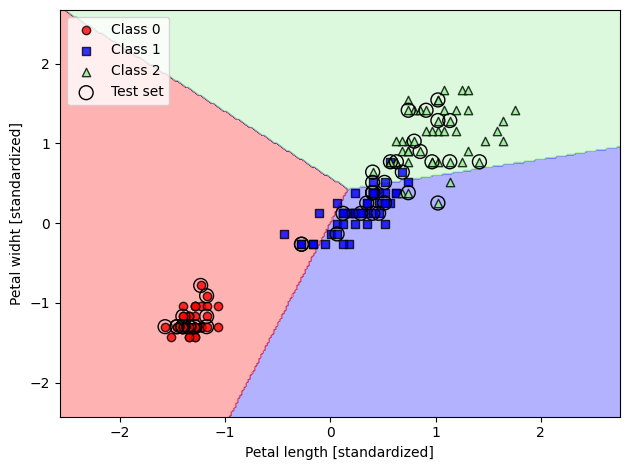

In [30]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std,
                      y=y_combined,
                      classifier=ppn,
                      test_idx = range(105,150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal widht [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()